# Step 0 : Resize and DPI

In [1]:
import cv2
from PIL import Image as ImagePIL
from PIL import Image

im = ImagePIL.open('testimage.png')
print(im)
print(type(im))
im = cv2.imread('testimage.png')
image = Image.fromarray(cv2.cvtColor(im,cv2.COLOR_BGR2RGB))
image.save('Step0.png',quality=95,dpi=(300.0,300.0))    #调整图像的分辨率


<PIL.PngImagePlugin.PngImageFile image mode=RGBA size=1276x958 at 0x7F9969353070>
<class 'PIL.PngImagePlugin.PngImageFile'>


# Step 1 : Increase Contrast

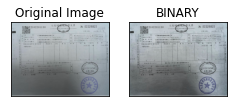

True

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread('Step0.png')
# converting to LAB color space
lab= cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
l_channel, a, b = cv2.split(lab)

# Applying CLAHE to L-channel
# feel free to try different values for the limit and grid size:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl = clahe.apply(l_channel)

# merge the CLAHE enhanced L-channel with the a and b channel
limg = cv2.merge((cl,a,b))

# Converting image from LAB Color model to BGR color spcae
enhanced_img = cv2.cvtColor(limg, cv2.COLOR_LAB2BGR)

# Stacking the original image with the enhanced image
result = np.hstack((img, enhanced_img))

titles = ['Original Image','BINARY']
images = [img, enhanced_img]

for i in range(2):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

cv2.imwrite('Step1.png', enhanced_img)

In [3]:
import cv2
from PIL import Image as ImagePIL
from PIL import Image

im = ImagePIL.open('Step1.png')
print(im)
print(type(im))
im = cv2.imread('Step1.png')
image = Image.fromarray(cv2.cvtColor(im,cv2.COLOR_BGR2RGB))
image.save('Step1.png',quality=95,dpi=(300.0,300.0))    #调整图像的分辨率

<PIL.PngImagePlugin.PngImageFile image mode=RGB size=1276x958 at 0x7F99697DC2E0>
<class 'PIL.PngImagePlugin.PngImageFile'>


# Step 2 : Remove Noise

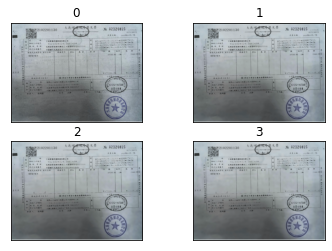

In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread("Step1.png")

dn1 = cv2.fastNlMeansDenoisingColored(img,None,5,10,7,21)
dn2 = cv2.fastNlMeansDenoisingColored(img,None,10,10,7,21)
dn3 = cv2.fastNlMeansDenoisingColored(img,None,13,13,7,21)

cv2.imwrite('Step2_1.png', dn1)
cv2.imwrite('Step2_2.png', dn2)
cv2.imwrite('Step2_3.png', dn3)

titles = ['0','1', '2',
            '3']
images = [img, dn1, dn2, dn3]
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

In [5]:
import cv2
from PIL import Image as ImagePIL
from PIL import Image

im = ImagePIL.open('Step2_1.png')
print(im)
print(type(im))
im = cv2.imread('Step2_1.png')
image = Image.fromarray(cv2.cvtColor(im,cv2.COLOR_BGR2RGB))
image.save('Step2_1.png',quality=95,dpi=(300.0,300.0))    #调整图像的分辨率

im = ImagePIL.open('Step2_2.png')
print(im)
print(type(im))
im = cv2.imread('Step2_2.png')
image = Image.fromarray(cv2.cvtColor(im,cv2.COLOR_BGR2RGB))
image.save('Step2_2.png',quality=95,dpi=(300.0,300.0))    #调整图像的分辨率

im = ImagePIL.open('Step2_3.png')
print(im)
print(type(im))
im = cv2.imread('Step2_3.png')
image = Image.fromarray(cv2.cvtColor(im,cv2.COLOR_BGR2RGB))
image.save('Step2_3.png',quality=95,dpi=(300.0,300.0))    #调整图像的分辨率

<PIL.PngImagePlugin.PngImageFile image mode=RGB size=1276x958 at 0x7F9959466DC0>
<class 'PIL.PngImagePlugin.PngImageFile'>
<PIL.PngImagePlugin.PngImageFile image mode=RGB size=1276x958 at 0x7F996932D580>
<class 'PIL.PngImagePlugin.PngImageFile'>
<PIL.PngImagePlugin.PngImageFile image mode=RGB size=1276x958 at 0x7F996932DAF0>
<class 'PIL.PngImagePlugin.PngImageFile'>


# Step 2.5 : Edge detection

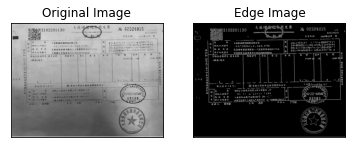

True

In [68]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('Step2_2.png',0)
edges = cv.Canny(img,100,200)
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

cv.imwrite('Step2_2temp.png', edges)

# Step 3 : Binarization

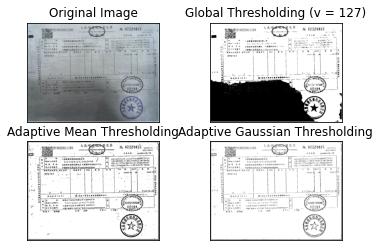

True

In [9]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt



img1 = cv.imread('Step2_1.png',0)
img1 = cv.medianBlur(img1,1)
img1 = cv.adaptiveThreshold(img1,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv.THRESH_BINARY,11,2)

img2 = cv.imread('Step2_2.png',0)
img2 = cv.medianBlur(img2,1)
ret,th1 = cv.threshold(img2,127,255,cv.THRESH_BINARY)
th2 = cv.adaptiveThreshold(img2,255,cv.ADAPTIVE_THRESH_MEAN_C,\
            cv.THRESH_BINARY,11,2)
th3 = cv.adaptiveThreshold(img2,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv.THRESH_BINARY,11,2)

#dilate(膨胀)
kernel = cv.getStructuringElement(cv.MORPH_RECT,(1,2))
th3= cv.dilate(th3,kernel,iterations=1)


img3 = cv.imread('Step2_3.png',0)
img3 = cv.medianBlur(img3,1)
img3 = cv.adaptiveThreshold(img3,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv.THRESH_BINARY,11,2)

img4 = cv.imread('Step2_2temp.png',0)
img4 = cv.medianBlur(img4,1)
img4 = cv.adaptiveThreshold(img4,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv.THRESH_BINARY,11,2)


titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]


for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

cv.imwrite('Step3_1.png', img1)
cv.imwrite('Step3_2.png', th3)
cv.imwrite('Step3_3.png', img3)
cv.imwrite('Step3_4.png', img4)


In [10]:
import cv2
from PIL import Image as ImagePIL
from PIL import Image

im = ImagePIL.open('Step3_1.png')
print(im)
print(type(im))
im = cv2.imread('Step3_1.png')
image = Image.fromarray(cv2.cvtColor(im,cv2.COLOR_BGR2RGB))
image.save('Step3_1.png',quality=95,dpi=(300.0,300.0))    #调整图像的分辨率

im = ImagePIL.open('Step3_2.png')
print(im)
print(type(im))
im = cv2.imread('Step3_2.png')
image = Image.fromarray(cv2.cvtColor(im,cv2.COLOR_BGR2RGB))
image.save('Step3_2.png',quality=95,dpi=(300.0,300.0))    #调整图像的分辨率

im = ImagePIL.open('Step3_3.png')
print(im)
print(type(im))
im = cv2.imread('Step3_3.png')
image = Image.fromarray(cv2.cvtColor(im,cv2.COLOR_BGR2RGB))
image.save('Step3_3.png',quality=95,dpi=(300.0,300.0))    #调整图像的分辨率

<PIL.PngImagePlugin.PngImageFile image mode=L size=1276x958 at 0x7F99697C6610>
<class 'PIL.PngImagePlugin.PngImageFile'>
<PIL.PngImagePlugin.PngImageFile image mode=L size=1276x958 at 0x7F9978894160>
<class 'PIL.PngImagePlugin.PngImageFile'>
<PIL.PngImagePlugin.PngImageFile image mode=L size=1276x958 at 0x7F9958C154F0>
<class 'PIL.PngImagePlugin.PngImageFile'>


# Step 4 : Deskew

In [11]:
import cv2
import numpy as np

def deskew(im, max_skew=10):
    height, width,temp = im.shape

    # Create a grayscale image and denoise it
    im_gs = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    im_gs = cv2.fastNlMeansDenoising(im_gs, h=3)

    # Create an inverted B&W copy using Otsu (automatic) thresholding
    im_bw = cv2.threshold(im_gs, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]

    # Detect lines in this image. Parameters here mostly arrived at by trial and error.
    lines = cv2.HoughLinesP(
        im_bw, 1, np.pi / 180, 200, minLineLength=width / 12, maxLineGap=width / 150
    )

    # Collect the angles of these lines (in radians)
    angles = []
    for line in lines:
        x1, y1, x2, y2 = line[0]
        angles.append(np.arctan2(y2 - y1, x2 - x1))

    # If the majority of our lines are vertical, this is probably a landscape image
    landscape = np.sum([abs(angle) > np.pi / 4 for angle in angles]) > len(angles) / 2

    # Filter the angles to remove outliers based on max_skew
    if landscape:
        angles = [
            angle
            for angle in angles
            if np.deg2rad(90 - max_skew) < abs(angle) < np.deg2rad(90 + max_skew)
        ]
    else:
        angles = [angle for angle in angles if abs(angle) < np.deg2rad(max_skew)]

    if len(angles) < 5:
        # Insufficient data to deskew
        return im

    # Average the angles to a degree offset
    angle_deg = np.rad2deg(np.median(angles))

    # If this is landscape image, rotate the entire canvas appropriately
    if landscape:
        if angle_deg < 0:
            im = cv2.rotate(im, cv2.ROTATE_90_CLOCKWISE)
            angle_deg += 90
        elif angle_deg > 0:
            im = cv2.rotate(im, cv2.ROTATE_90_COUNTERCLOCKWISE)
            angle_deg -= 90

    # Rotate the image by the residual offset
    M = cv2.getRotationMatrix2D((width / 2, height / 2), angle_deg, 1)
    im = cv2.warpAffine(im, M, (width, height), borderMode=cv2.BORDER_REPLICATE)
    return im

In [12]:
import cv2
img = cv2.imread('Step3_2.png')
result = deskew(img)
cv2.imwrite('Step4_2.png', result)

True